# Library 

In [ ]:
from library import *

2023-10-10 13:37:54.030101: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 13:37:54.436850: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-10 13:37:54.436889: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-10 13:37:54.539762: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-10 13:37:59.017486: W tensorflow/stream_executor/platform/de

# Dataset organization

In [ ]:
data = pd.read_csv("Datasets/data.csv", sep=";")
data

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant
0,2,6,7,3,8,4,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb
1,6,5,3,6,1,2,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb
2,6,3,3,8,1,3,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb
3,7,6,10,3,0,9,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb
4,3,5,8,6,5,7,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,1,6,1,11,5,8,3,2,1,21,170,0,d617476c80b6823ed202f5b86916156d
4478,2,5,11,14,3,5,4,3,1,21,170,0,d617476c80b6823ed202f5b86916156d
4479,1,6,1,11,4,2,1,5,1,21,170,0,d617476c80b6823ed202f5b86916156d
4480,4,1,11,1,5,7,7,8,1,21,170,0,d617476c80b6823ed202f5b86916156d


In [ ]:
#add right value
data['value_right'] = 10 - data.value_left
data

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant,value_right
0,2,6,7,3,8,4,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,2
1,6,5,3,6,1,2,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
2,6,3,3,8,1,3,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
3,7,6,10,3,0,9,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,10
4,3,5,8,6,5,7,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,1,6,1,11,5,8,3,2,1,21,170,0,d617476c80b6823ed202f5b86916156d,5
4478,2,5,11,14,3,5,4,3,1,21,170,0,d617476c80b6823ed202f5b86916156d,7
4479,1,6,1,11,4,2,1,5,1,21,170,0,d617476c80b6823ed202f5b86916156d,6
4480,4,1,11,1,5,7,7,8,1,21,170,0,d617476c80b6823ed202f5b86916156d,5


In [ ]:
#we print label in left and right char to be more readable
for s in ["left","right"]:
    data[ s + "_char"] = [ 'p1' if i == 1 
                               else 'p2' if i == 2 
                                else 'p3' if i == 3 
                                else 'p4' if i == 4 
                                else 'p5' if i == 5 
                                else 'p6' if i == 6 
                                else 'p7' if i == 7 
                                else i for i in data[s + "_char"]]
data

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant,value_right
0,p2,p6,7,3,8,4,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,2
1,p6,p5,3,6,1,2,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
2,p6,p3,3,8,1,3,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
3,p7,p6,10,3,0,9,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,10
4,p3,p5,8,6,5,7,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,p1,p6,1,11,5,8,3,2,1,21,170,0,d617476c80b6823ed202f5b86916156d,5
4478,p2,p5,11,14,3,5,4,3,1,21,170,0,d617476c80b6823ed202f5b86916156d,7
4479,p1,p6,1,11,4,2,1,5,1,21,170,0,d617476c80b6823ed202f5b86916156d,6
4480,p4,p1,11,1,5,7,7,8,1,21,170,0,d617476c80b6823ed202f5b86916156d,5


In [ ]:
#prendre tout les personnages de gauches et les personnages de droites qui n'apparraissent pas en tant que personnages de gauches
  
left = data.left_char.unique()
right = data.right_char.unique()

anova = data

for i in right :
    if i not in left :
        miss_char = i

data_right = data[data.right_char == miss_char].rename(columns={"right_char":"left_char","value_right":"value_left","left_char":"right_char","value_left":"value_right","strength_left":"strength_right","strength_right":"strength_left"})
anova = pd.concat([anova, data_right] , axis=0, ignore_index= True)

anova

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant,value_right
0,p2,p6,7,3,8,4,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,2
1,p6,p5,3,6,1,2,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
2,p6,p3,3,8,1,3,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
3,p7,p6,10,3,0,9,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,10
4,p3,p5,8,6,5,7,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,p5,p1,14,1,9,1,3,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,1
5810,p5,p2,14,11,7,5,4,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,3
5811,p5,p1,14,1,8,1,3,1,1,21,170,0,d617476c80b6823ed202f5b86916156d,2
5812,p5,p2,14,11,7,5,4,3,1,21,170,0,d617476c80b6823ed202f5b86916156d,3


In [ ]:
#changer la valeur de value_left_rep1 et 2 quand right_char = p5
for i in anova.index :
    if anova.loc[i].left_char == miss_char :
        if anova.loc[i].value_left_rep1 >=0 :
            new_value_left_rep1 = anova.loc[i].value_left_rep1
            anova.loc[i,'value_left_rep1'] = 10 - new_value_left_rep1
        if anova.loc[i].value_left_rep2 >=0 :
            new_value_left_rep2 = anova.loc[i].value_left_rep2
            anova.loc[i,'value_left_rep2'] = 10 - new_value_left_rep2

anova

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant,value_right
0,p2,p6,7,3,8,4,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,2
1,p6,p5,3,6,1,2,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
2,p6,p3,3,8,1,3,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
3,p7,p6,10,3,0,9,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,10
4,p3,p5,8,6,5,7,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,p5,p1,14,1,9,1,7,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,1
5810,p5,p2,14,11,7,5,6,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,3
5811,p5,p1,14,1,8,1,7,9,1,21,170,0,d617476c80b6823ed202f5b86916156d,2
5812,p5,p2,14,11,7,5,6,7,1,21,170,0,d617476c80b6823ed202f5b86916156d,3


In [ ]:
#we separate the dataset by scenario type
data_d = anova[anova.scenario < 4]
data_f = anova[(anova.scenario > 3) & (anova.scenario < 7)]
data_r = anova[anova.scenario > 6]

display(data_d)
display(data_f)
display(data_r)

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant,value_right
1,p6,p5,3,6,1,2,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
2,p6,p3,3,8,1,3,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
6,p1,p6,1,3,5,1,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
11,p6,p5,3,6,1,2,1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
14,p1,p6,1,3,5,1,5,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,p5,p2,5,6,3,1,4,-1,1,22,195,0,e12954e890f1701804c8ccd73d74ca4d,7
5792,p5,p2,5,6,3,1,4,3,1,22,195,0,e12954e890f1701804c8ccd73d74ca4d,7
5807,p5,p1,14,1,7,1,-1,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,3
5809,p5,p1,14,1,9,1,7,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,1


,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant,value_right
0,p2,p6,7,3,8,4,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,2
7,p1,p6,1,3,2,5,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,8
8,p4,p3,5,8,2,6,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,8
9,p1,p6,1,3,2,5,2,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,8
15,p2,p6,7,3,5,4,8,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,p5,p2,14,11,6,5,-1,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,4
5808,p5,p7,14,10,5,4,3,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,5
5810,p5,p2,14,11,7,5,6,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,3
5812,p5,p2,14,11,7,5,6,7,1,21,170,0,d617476c80b6823ed202f5b86916156d,3


,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant,value_right
3,p7,p6,10,3,0,9,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,10
4,p3,p5,8,6,5,7,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
5,p7,p1,10,1,0,8,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,10
10,p7,p6,10,3,0,9,0,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,10
12,p3,p5,8,6,5,7,5,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798,p5,p1,2,1,7,7,7,-1,0,20,165,0,2444821f6910f3203d011da7eec1e966,3
5800,p5,p4,2,2,5,8,5,-1,0,20,165,0,2444821f6910f3203d011da7eec1e966,5
5801,p5,p1,2,1,3,9,3,5,0,20,165,0,2444821f6910f3203d011da7eec1e966,7
5802,p5,p4,2,2,5,8,5,5,0,20,165,0,2444821f6910f3203d011da7eec1e966,5


# ANOVA

In [ ]:
#We calculate the anova on the value give for each type of character
lm_d = ols('value_left ~ C(left_char)', data=data_d).fit()
anova_d = sm.stats.anova_lm(lm_d, typ=1)

lm_f = ols('value_left ~ C(left_char)', data=data_f).fit()
anova_f = sm.stats.anova_lm(lm_f, typ=1)

lm_r = ols('value_left ~ C(left_char)', data=data_r).fit()
anova_r = sm.stats.anova_lm(lm_r, typ=1)

#We display it in a table in Markdown
display(Markdown("## ANOVA in DANGER"))
display(anova_d)
display(Markdown("## ANOVA in FATIGUE"))
display(anova_f)
display(Markdown("## ANOVA in REWARD"))
display(anova_r)

## ANOVA in DANGER

,df,sum_sq,mean_sq,F,PR(>F)
C(left_char),6.0,4535.680105,755.946684,142.225644,3.751799e-149
Residual,1901.0,10104.047359,5.315122,NaN,NaN


## ANOVA in FATIGUE

,df,sum_sq,mean_sq,F,PR(>F)
C(left_char),6.0,6264.530586,1044.088431,192.386281,5.988449e-193
Residual,1958.0,10626.148295,5.427042,NaN,NaN


## ANOVA in REWARD

,df,sum_sq,mean_sq,F,PR(>F)
C(left_char),6.0,3634.997647,605.832941,134.883519,6.396439e-143
Residual,1934.0,8686.612863,4.491527,NaN,NaN


# Post-hoc : Bonferroni correction

In [ ]:
display(Markdown('# POST HOC IN DANGER'))
p_value_d = sp.posthoc_ttest(data_d,
                           val_col='value_left',
                           group_col='left_char') * 6

display(p_value_d)

display(Markdown('# POST HOC IN FATIGUE'))
p_value_f = sp.posthoc_ttest(data_f,
                           val_col='value_left',
                           group_col='left_char') * 6

display(p_value_f)

display(Markdown('# POST HOC IN REWARD'))
p_value_r = sp.posthoc_ttest(data_r,
                           val_col='value_left',
                           group_col='left_char') * 6

display(p_value_r)

# POST HOC IN DANGER

,p6,p1,p7,p2,p4,p3,p5
p6,6.000000e+00,1.880432e-01,1.322303e-85,1.240508e-18,3.425622e-09,6.412062e-13,1.495105e-27
p1,1.880432e-01,6.000000e+00,1.123352e-110,5.217869e-31,3.196109e-17,7.058591e-22,2.832317e-43
p7,1.322303e-85,1.123352e-110,6.000000e+00,6.081793e-47,3.328969e-52,1.486984e-21,3.106985e-41
p2,1.240508e-18,5.217869e-31,6.081793e-47,6.000000e+00,5.690253e-02,3.446907e+00,2.456533e-01
p4,3.425622e-09,3.196109e-17,3.328969e-52,5.690253e-02,6.000000e+00,2.275237e-01,3.165162e-05
p3,6.412062e-13,7.058591e-22,1.486984e-21,3.446907e+00,2.275237e-01,6.000000e+00,3.198733e+00
p5,1.495105e-27,2.832317e-43,3.106985e-41,2.456533e-01,3.165162e-05,3.198733e+00,6.000000e+00


# POST HOC IN FATIGUE

,p2,p1,p4,p7,p6,p3,p5
p2,6.000000e+00,1.122497e-41,9.904486e-04,1.757315e-51,1.117441e-31,1.351123e+00,3.683868e+00
p1,1.122497e-41,6.000000e+00,3.267557e-24,1.886447e-138,1.593357e+00,1.407727e-32,1.919766e-44
p4,9.904486e-04,3.267557e-24,6.000000e+00,2.349948e-70,1.285236e-17,2.358132e-03,2.161929e-03
p7,1.757315e-51,1.886447e-138,2.349948e-70,6.000000e+00,1.462445e-122,5.178665e-23,5.194281e-61
p6,1.117441e-31,1.593357e+00,1.285236e-17,1.462445e-122,6.000000e+00,1.027895e-36,4.055783e-33
p3,1.351123e+00,1.407727e-32,2.358132e-03,5.178665e-23,1.027895e-36,6.000000e+00,7.117119e-01
p5,3.683868e+00,1.919766e-44,2.161929e-03,5.194281e-61,4.055783e-33,7.117119e-01,6.000000e+00


# POST HOC IN REWARD

,p7,p3,p4,p2,p1,p6,p5
p7,6.000000e+00,1.019232e-15,1.046450e-60,3.694521e-74,1.527842e-11,4.415329e-14,1.726175e-75
p3,1.019232e-15,6.000000e+00,5.339617e-02,4.615995e-03,1.074822e-08,2.273645e-04,1.526302e-02
p4,1.046450e-60,5.339617e-02,6.000000e+00,1.161880e+00,3.192123e-23,3.827595e-11,5.719573e+00
p2,3.694521e-74,4.615995e-03,1.161880e+00,6.000000e+00,8.445858e-29,2.394776e-14,7.469386e-01
p1,1.527842e-11,1.074822e-08,3.192123e-23,8.445858e-29,6.000000e+00,5.915559e-02,4.835155e-30
p6,4.415329e-14,2.273645e-04,3.827595e-11,2.394776e-14,5.915559e-02,6.000000e+00,1.681887e-14
p5,1.726175e-75,1.526302e-02,5.719573e+00,7.469386e-01,4.835155e-30,1.681887e-14,6.000000e+00


# Detailed analysis of participants' responses

## Distribution of the perceived force

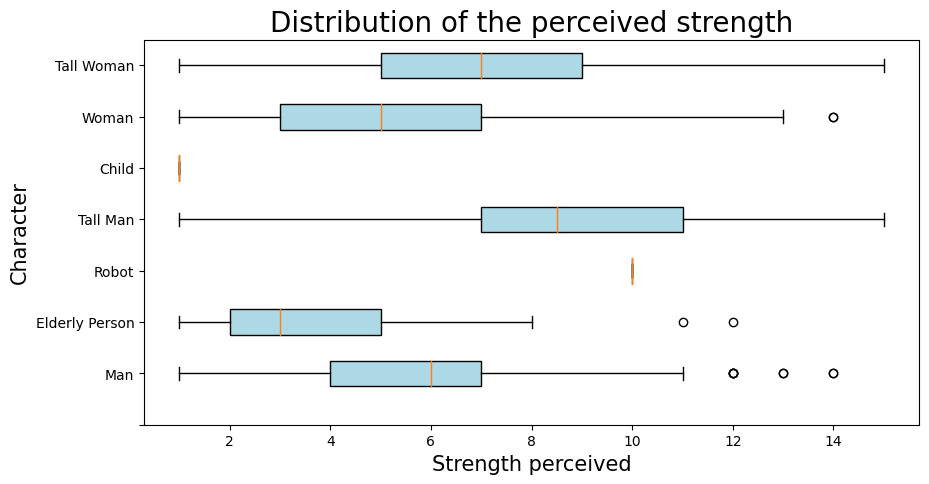

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
character = anova.left_char.unique()
strength = []
for i in character:
    strength.append(anova[anova.left_char == i][[
        "left_char", "strength_left", "id_participant"]].drop_duplicates(subset=['id_participant'])["strength_left"])

plt.boxplot(strength, labels=character, vert=False, patch_artist=True, boxprops={'facecolor': 'lightblue'})

plt.title("Distribution of the perceived strength",fontsize=20)
plt.xlabel('Strength perceived', fontsize=15)
plt.ylabel('Character', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(range(8),[' ','Man','Elderly Person','Robot','Tall Man','Child','Woman','Tall Woman'])
plt.show()

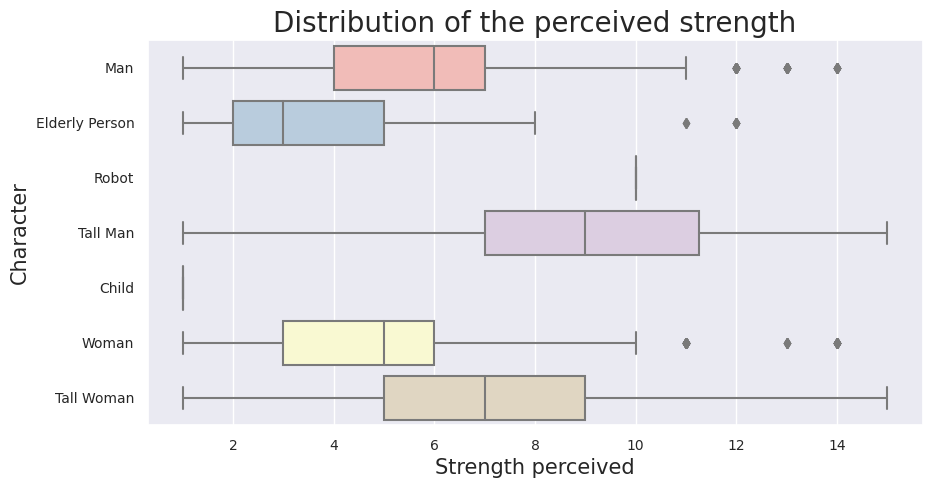

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

sns.boxplot( x=anova["strength_left"], y=anova["left_char"], palette="Pastel1" )
sns.stripplot(x=anova["strength_left"], y=anova["left_char"], data=anova, color="orange", jitter=0.2, size=0)
plt.title("Distribution of the perceived strength",fontsize=20)
plt.xlabel('Strength perceived', fontsize=15)
plt.ylabel('Character', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.yticks(['p1','p2','p3','p4','p5','p6','p7'],['Child','Man','Tall Man','Woman','Tall Woman','Elderly Person','Robot'])
plt.show()

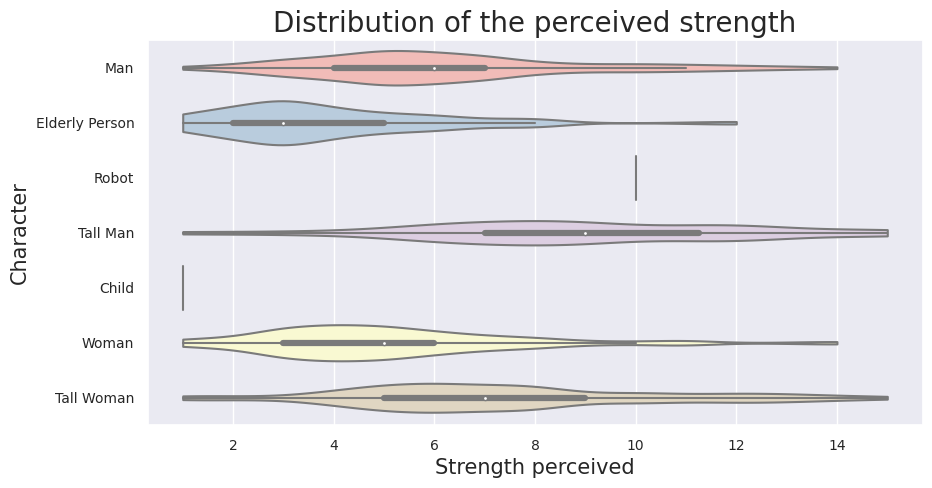

In [ ]:
sns.set(style="darkgrid")
 
# Grouped violinplot
ax = sns.violinplot(x=anova["strength_left"], y=anova["left_char"], data=anova, palette="Pastel1",cut=0,density_norm="count")
sns.stripplot(x=anova["strength_left"], y=anova["left_char"], data=data, color="orange", jitter=0.2, size=0)
plt.title("Distribution of the perceived strength",fontsize=20)
plt.xlabel('Strength perceived', fontsize=15)
plt.ylabel('Character', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=10)

plt.yticks(['p1','p2','p3','p4','p5','p6','p7'],['Child','Man','Tall Man','Woman','Tall Woman','Elderly Person','Robot'])
plt.show()

In [ ]:
for char in ['p1','p2','p3','p4','p5','p6','p7'] :
    print(anova[anova.left_char == char].strength_left.median())

1.0
6.0
9.0
5.0
7.0
3.0
10.0


## Distribution of pairs

/root/work/library.py:82: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pairs[(i, j)] = DF[DF.left_char == i][DF.right_char == j].shape[0]


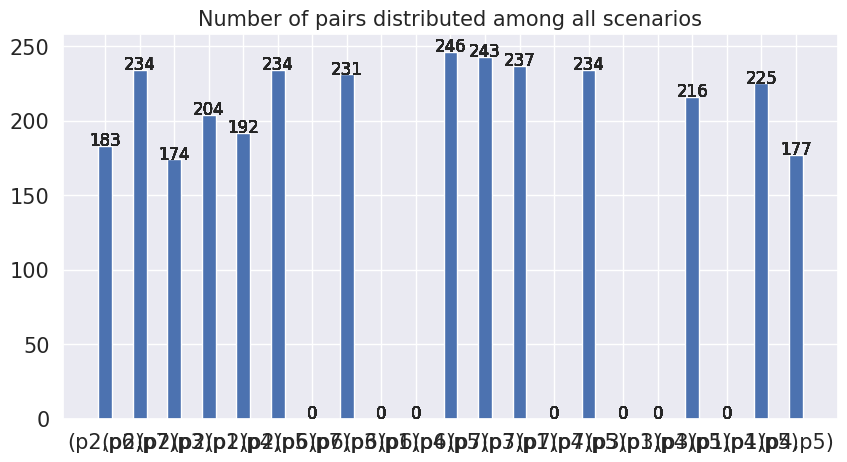

Mean: 144
STD: 106.54395471219513
Max: ('p6', 'p5')  -  246
Min: ('p6', 'p7')  -  0
Sum: 3030


In [ ]:
plt.title("Number of pairs distributed among all scenarios", size=15)
show_pairs_occurence(anova, character)

## Influence of repetitions

In [ ]:
data_rep = anova[(anova.value_left_rep1 >= 0) & (anova.value_left_rep2 >= 0)]
data_rep_danger = data_rep[data_rep.scenario < 4]
data_rep_fatigue = data_rep[(data_rep.scenario > 3) & (data_rep.scenario < 7)]
data_rep_reward = data_rep[data_rep.scenario > 6]

In [ ]:
rep_table(data_rep_danger)

,"['p1', 'p2']","['p1', 'p3']","['p1', 'p4']","['p1', 'p5']","['p1', 'p6']","['p1', 'p7']","['p2', 'p3']","['p2', 'p4']","['p2', 'p5']","['p2', 'p6']",...,"['p3', 'p4']","['p3', 'p5']","['p3', 'p6']","['p3', 'p7']","['p4', 'p5']","['p4', 'p6']","['p4', 'p7']","['p5', 'p6']","['p5', 'p7']","['p6', 'p7']"
median,NaN,0.00,NaN,0.00,2.00,NaN,2.00,0.00,0.0,2.00,...,NaN,0.00,NaN,NaN,0.00,0.00,2.00,2.0,0.00,NaN
std,NaN,3.58,NaN,2.02,2.62,NaN,1.21,1.95,1.8,1.19,...,NaN,2.24,NaN,NaN,2.46,1.41,4.62,3.3,4.88,NaN


In [ ]:
rep_table(data_rep_fatigue)

,"['p1', 'p2']","['p1', 'p3']","['p1', 'p4']","['p1', 'p5']","['p1', 'p6']","['p1', 'p7']","['p2', 'p3']","['p2', 'p4']","['p2', 'p5']","['p2', 'p6']",...,"['p3', 'p4']","['p3', 'p5']","['p3', 'p6']","['p3', 'p7']","['p4', 'p5']","['p4', 'p6']","['p4', 'p7']","['p5', 'p6']","['p5', 'p7']","['p6', 'p7']"
median,NaN,0.0,NaN,2.00,2.00,NaN,0.00,0.00,0.00,2.00,...,NaN,2.00,NaN,NaN,2.00,2.00,0.00,2.00,0.00,NaN
std,NaN,4.3,NaN,5.42,2.11,NaN,2.34,1.95,2.52,1.91,...,NaN,1.56,NaN,NaN,2.52,1.42,2.91,2.46,3.09,NaN


In [ ]:
rep_table(data_rep_reward)

,"['p1', 'p2']","['p1', 'p3']","['p1', 'p4']","['p1', 'p5']","['p1', 'p6']","['p1', 'p7']","['p2', 'p3']","['p2', 'p4']","['p2', 'p5']","['p2', 'p6']",...,"['p3', 'p4']","['p3', 'p5']","['p3', 'p6']","['p3', 'p7']","['p4', 'p5']","['p4', 'p6']","['p4', 'p7']","['p5', 'p6']","['p5', 'p7']","['p6', 'p7']"
median,NaN,0.00,NaN,2.00,0.00,NaN,0.00,0.00,0.00,0.00,...,NaN,0.00,NaN,NaN,0.00,0.00,0.00,2.00,0.00,NaN
std,NaN,1.12,NaN,1.83,2.24,NaN,2.11,0.72,3.63,3.83,...,NaN,1.65,NaN,NaN,3.57,3.24,2.69,2.92,4.82,NaN


# Difference in character's variables

## Difference between man and woman

In [ ]:
#dataframe of only pair with man against woman
man = ["p2","p3"]
woman = ["p4","p5"]
data_mw = data[((data.left_char.isin(man)) & (data.right_char.isin(woman)) | (data.left_char.isin(woman)) & (data.right_char.isin(man)))]
data_mw

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant,value_right
4,p3,p5,8,6,5,7,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
8,p4,p3,5,8,2,6,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,8
12,p3,p5,8,6,5,7,5,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
16,p4,p3,5,8,2,6,2,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,8
19,p4,p3,5,8,3,6,2,2,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4442,p2,p4,4,2,6,2,7,-1,0,20,165,0,2444821f6910f3203d011da7eec1e966,4
4452,p2,p4,4,2,5,2,7,6,0,20,165,0,2444821f6910f3203d011da7eec1e966,5
4462,p2,p5,11,14,4,5,-1,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,6
4469,p2,p5,11,14,3,5,4,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,7


<table><thead><tr><th></th><th>Risk</th><th>Effort</th><th>Reward</th></tr></thead><tbody><tr><td>f value</td><td>1.32</td><td>14.99</td><td>0.23</td></tr><tr><td>p value</td><td>2.52e-01</td><td>1.26e-04</td><td>6.31e-01</td></tr></tbody></table>

**!!! No significant difference in risk scenario !!!**

**!!! No significant difference in reward scenario !!!**

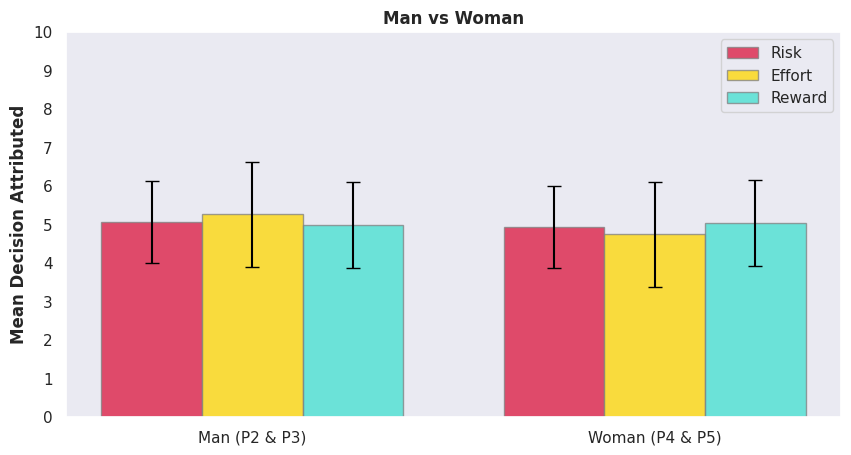

In [ ]:
#we print bar plot and anova for this type of pair
title =  "Man vs Woman"
left_label = "Man (P2 & P3)"
right_label = "Woman (P4 & P5)"
setup_correlation(data_mw, man, woman, title, left_label, right_label)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/root/work/library.py:193: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = data[data[

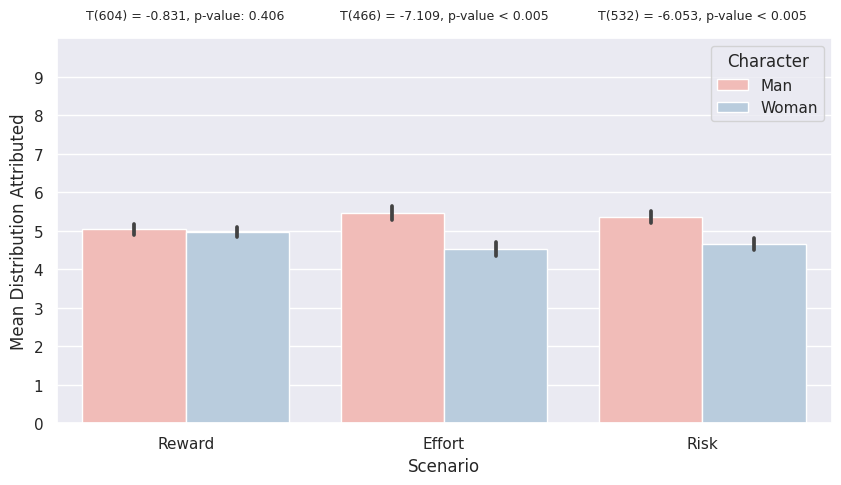

In [ ]:
data_mw["scenario"] = ["Risk" if (i > 0 and i < 4) else "Effort" if (i > 3 and i < 7) else "Reward" for i in data_mw["scenario"]]
for side in ["left","right"] :
    data_mw[side + "_char"] = ["Man" if i in ["p2","p3"] else "Woman" for i in data_mw[side + "_char"]]
bar_plot(data_mw)

## Difference between robot and human

In [ ]:
#dataframe of only pair with robot against human
robot = ["p7"]
human = [x for x in character if x not in robot]
data_hr = data[((data.left_char.isin(human)) & (data.right_char.isin(robot)) | (data.left_char.isin(robot)) & (data.right_char.isin(human)))]

data_hr

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant,value_right
3,p7,p6,10,3,0,9,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,10
5,p7,p1,10,1,0,8,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,10
10,p7,p6,10,3,0,9,0,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,10
13,p7,p1,10,1,0,8,0,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,10
24,p7,p6,10,3,0,9,0,0,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4459,p2,p7,11,10,2,3,-1,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,8
4464,p7,p5,10,14,5,4,7,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,5
4471,p2,p7,11,10,2,3,2,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,8
4473,p2,p7,11,10,2,3,2,2,1,21,170,0,d617476c80b6823ed202f5b86916156d,8


<table><thead><tr><th></th><th>Risk</th><th>Effort</th><th>Reward</th></tr></thead><tbody><tr><td>f value</td><td>510.19</td><td>672.19</td><td>810.69</td></tr><tr><td>p value</td><td>3.15e-69</td><td>1.46e-73</td><td>3.08e-89</td></tr></tbody></table>

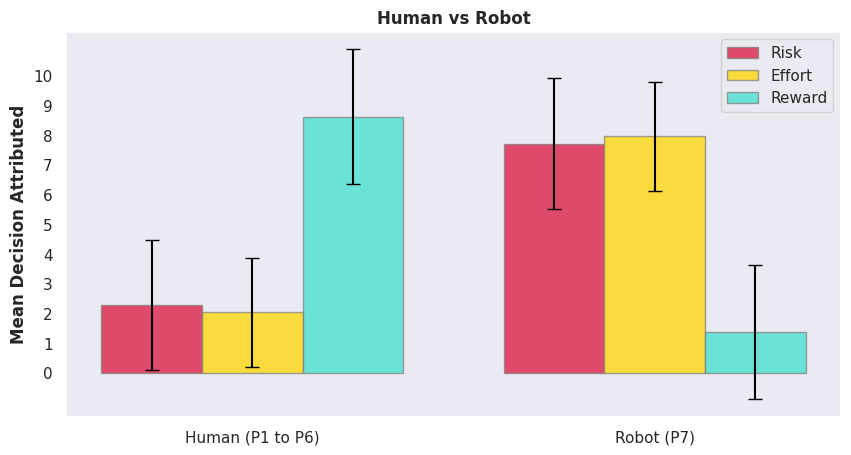

In [ ]:
#we print bar plot and anova for this type of pair
title =  "Human vs Robot"
left_label = "Human (P1 to P6)"
right_label = "Robot (P7)"
setup_correlation( data_hr, human, robot, title, left_label, right_label)


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/root/work/library.py:193: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = data[data["Character"] == chars[1]][data["Scenario"] == scenario][
/root/work/library.py:196: UserW

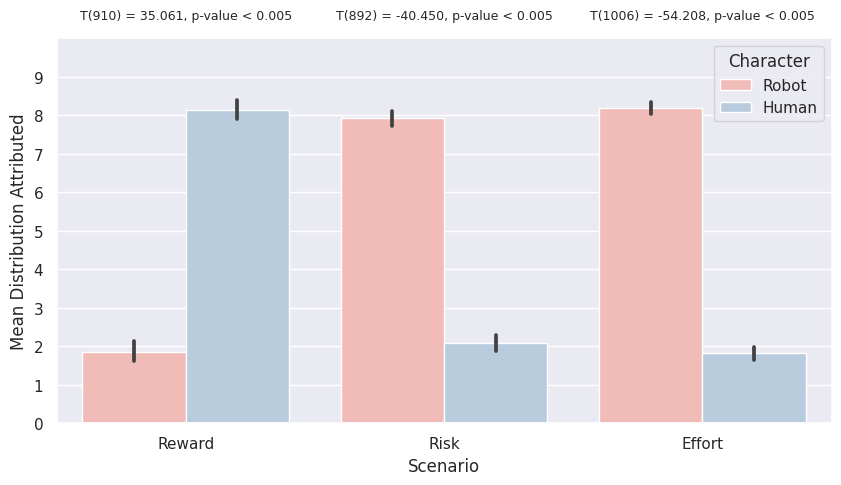

In [ ]:
data_hr["scenario"] = ["Risk" if (i > 0 and i < 4) else "Effort" if (i > 3 and i < 7) else "Reward" for i in data_hr["scenario"]]
for side in ["left","right"] :
    data_hr[side + "_char"] = ["Robot" if i == "p7" else "Human" for i in data_hr[side + "_char"]]
bar_plot(data_hr)

## Difference between child, adult and old_person

In [ ]:
#dataframe of only pair with robot against human
child = ["p1"]
old_person = ["p6"]
adult = [x for x in human if (x not in child) and (x not in old_person)]

data_ca = data[((data.left_char.isin(child)) & (data.right_char.isin(adult)) | (data.left_char.isin(adult)) & (data.right_char.isin(child)))]
data_ao = data[((data.left_char.isin(adult)) & (data.right_char.isin(old_person)) | (data.left_char.isin(old_person)) & (data.right_char.isin(adult)))]
data_co = data[(data.left_char.isin(child)) & (data.right_char.isin(old_person)) | (data.left_char.isin(old_person)) & (data.right_char.isin(child))]


<table><thead><tr><th></th><th>Risk</th><th>Effort</th><th>Reward</th></tr></thead><tbody><tr><td>f value</td><td>580.58</td><td>822.77</td><td>173.74</td></tr><tr><td>p value</td><td>1.54e-73</td><td>1.66e-84</td><td>5.50e-30</td></tr></tbody></table>

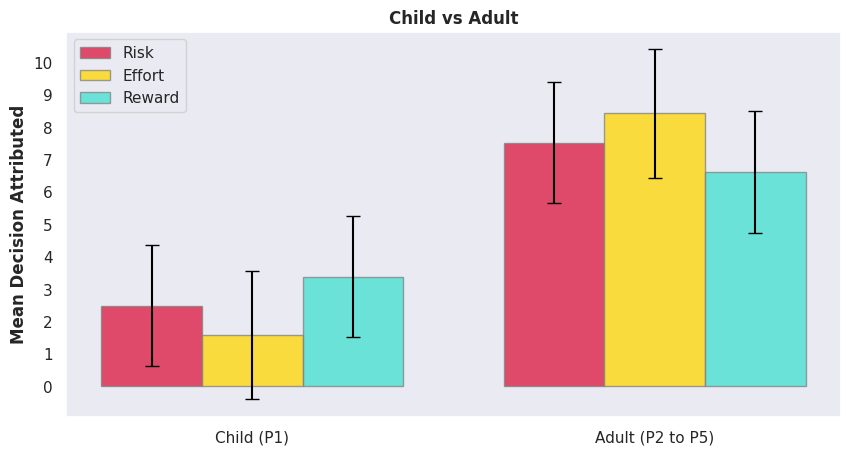

<table><thead><tr><th></th><th>Risk</th><th>Effort</th><th>Reward</th></tr></thead><tbody><tr><td>f value</td><td>447.63</td><td>569.37</td><td>20.52</td></tr><tr><td>p value</td><td>6.08e-55</td><td>1.13e-72</td><td>8.60e-06</td></tr></tbody></table>

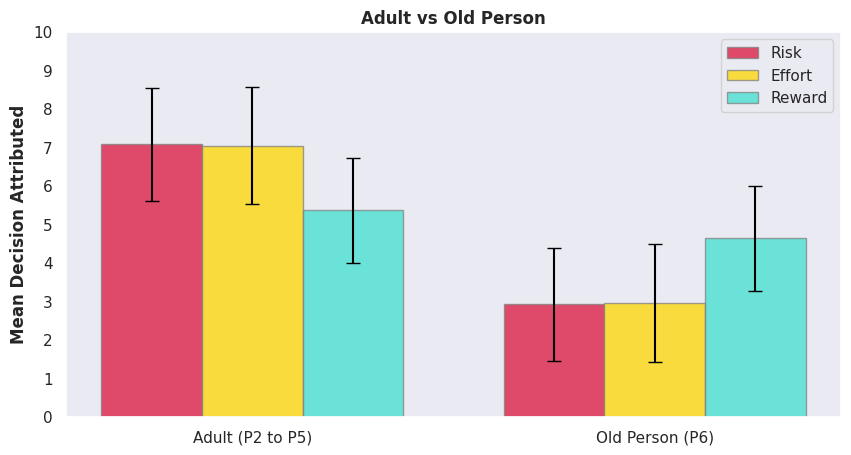

<table><thead><tr><th></th><th>Risk</th><th>Effort</th><th>Reward</th></tr></thead><tbody><tr><td>f value</td><td>109.79</td><td>41.27</td><td>33.85</td></tr><tr><td>p value</td><td>9.92e-20</td><td>3.33e-09</td><td>4.38e-08</td></tr></tbody></table>

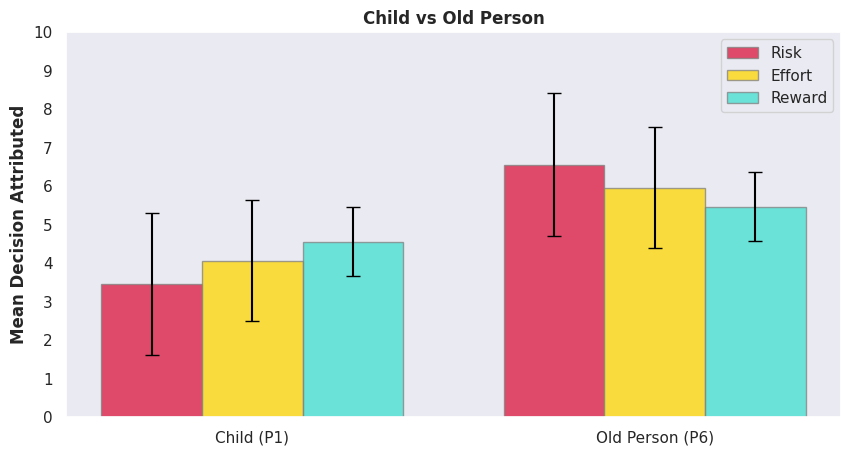

In [ ]:
#we print bar plot and anova for this type of pair
title =  "Child vs Adult"
left_label = "Child (P1)"
right_label = "Adult (P2 to P5)"
setup_correlation( data_ca, child, adult, title, left_label, right_label)

title =  "Adult vs Old Person"
left_label = "Adult (P2 to P5)"
right_label = "Old Person (P6)"
setup_correlation( data_ao, adult, old_person, title, left_label, right_label)

title =  "Child vs Old Person"
left_label = "Child (P1)"
right_label = "Old Person (P6)"
setup_correlation( data_co, child, old_person, title, left_label, right_label)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/root/work/library.py:193: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = data[data[

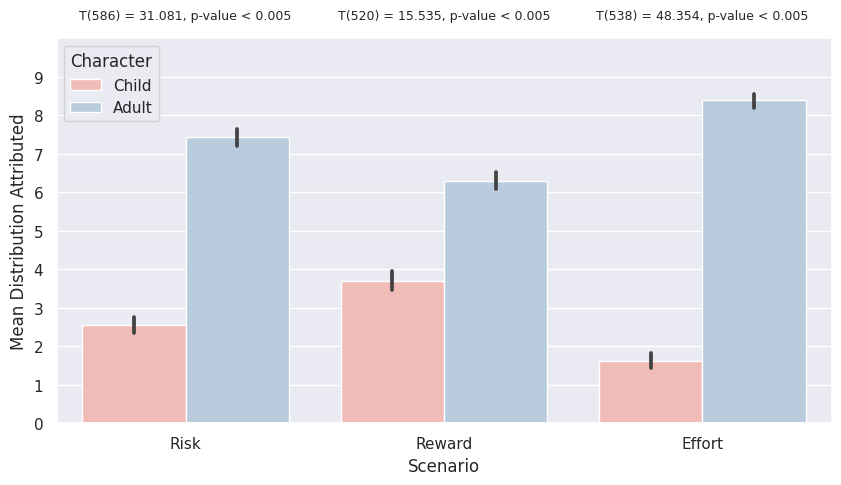

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/root/work/library.py:193: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = data[data["Character"] == chars[1]][data["Scenario"] == scenario][
/root/work/library.py:196: UserWarning: Boolean Series key will be re

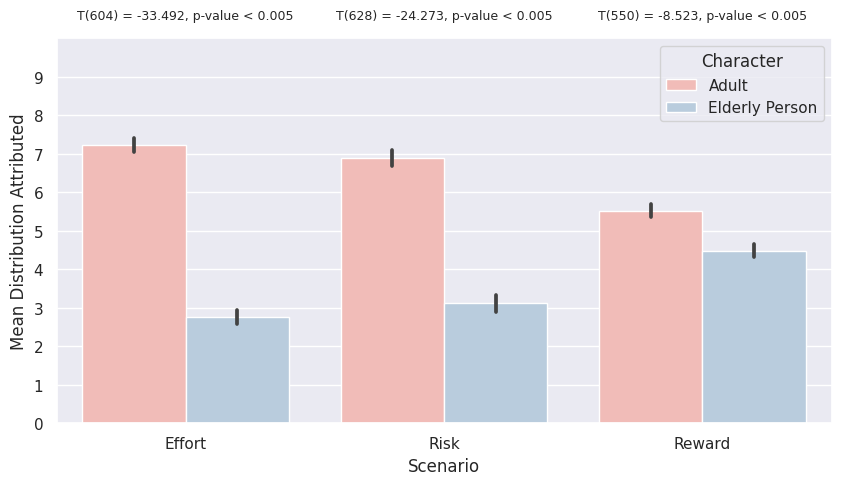

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/root/work/library.py:193: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = data[data["Character"] == chars[1]][data["Scenario"] == scenario

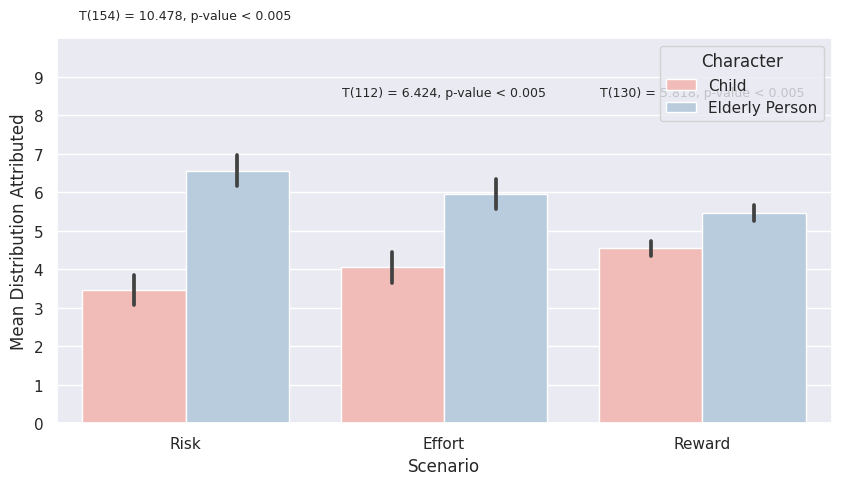

In [ ]:
data_ca["scenario"] = ["Risk" if (i > 0 and i < 4) else "Effort" if (i > 3 and i < 7) else "Reward" for i in data_ca["scenario"]]
for side in ["left","right"] :
    data_ca[side + "_char"] = ["Child" if i == "p1" else "Adult" for i in data_ca[side + "_char"]]
bar_plot(data_ca)

data_ao["scenario"] = ["Risk" if (i > 0 and i < 4) else "Effort" if (i > 3 and i < 7) else "Reward" for i in data_ao["scenario"]]
for side in ["left","right"] :
    data_ao[side + "_char"] = ["Elderly Person" if i == "p6" else "Adult" for i in data_ao[side + "_char"]]
bar_plot(data_ao)

data_co["scenario"] = ["Risk" if (i > 0 and i < 4) else "Effort" if (i > 3 and i < 7) else "Reward" for i in data_co["scenario"]]
for side in ["left","right"] :
    data_co[side + "_char"] = ["Child" if i == "p1" else "Elderly Person" for i in data_co[side + "_char"]]
bar_plot(data_co)

#  Difference in Reward scenarios

## Human vs Robot

/root/work/library.py:193: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = data[data["Character"] == chars[1]][data["Scenario"] == scenario][
/root/work/library.py:196: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = data[data["Character"] == chars[0]][data["Scenario"] == scenario][


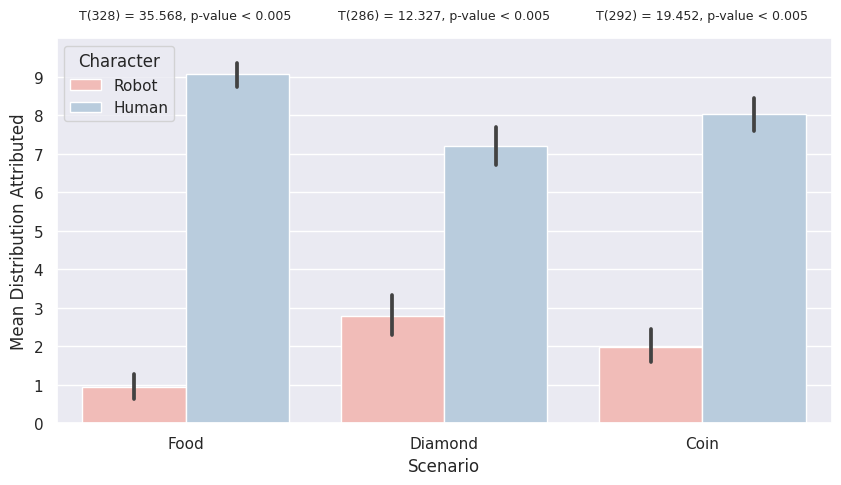

In [ ]:
#dataframe of only pair with robot against human
robot = ["p7"]
human = [x for x in character if x not in robot]
data_hr = data[((data.left_char.isin(human)) & (data.right_char.isin(robot)) | (data.left_char.isin(robot)) & (data.right_char.isin(human)))]

data_hr = data_hr[data_hr.scenario > 6]
data_hr["scenario"] = ["Food" if i == 9 else "Diamond" if i == 8 else "Coin" for i in data_hr["scenario"]]
for side in ["left","right"] :
    data_hr[side + "_char"] = ["Robot" if i == "p7" else "Human" for i in data_hr[side + "_char"]]
bar_plot(data_hr)

## Man vs Woman

/root/work/library.py:193: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = data[data["Character"] == chars[1]][data["Scenario"] == scenario][
/root/work/library.py:196: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = data[data["Character"] == chars[0]][data["Scenario"] == scenario][


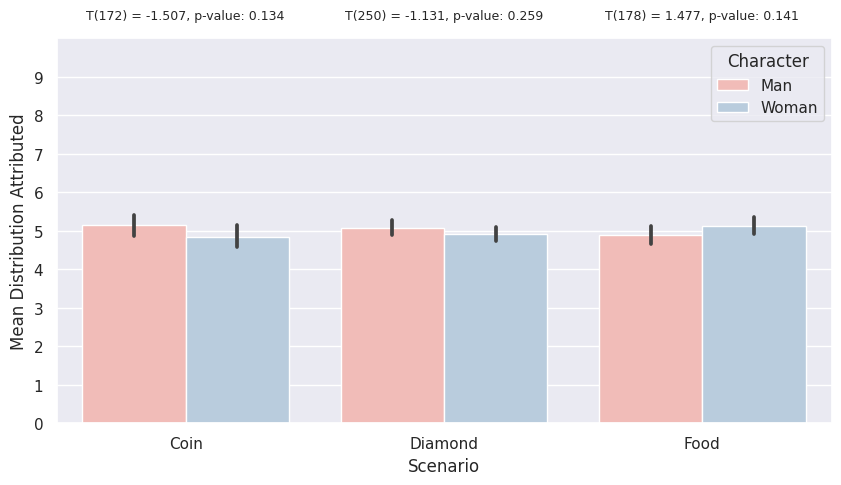

In [ ]:
#dataframe of only pair with man against woman
man = ["p2","p3"]
woman = ["p4","p5"]
data_mw = data[((data.left_char.isin(man)) & (data.right_char.isin(woman)) | (data.left_char.isin(woman)) & (data.right_char.isin(man)))]

data_mw = data_mw[data_mw.scenario > 6]
data_mw["scenario"] = ["Food" if i == 9 else "Diamond" if i == 8 else "Coin" for i in data_mw["scenario"]]
for side in ["left","right"] :
    data_mw[side + "_char"] = ["Man" if i in ["p2","p3"] else "Woman" for i in data_mw[side + "_char"]]
bar_plot(data_mw)


## Difference on the age of the character

/root/work/library.py:193: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = data[data["Character"] == chars[1]][data["Scenario"] == scenario][
/root/work/library.py:196: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = data[data["Character"] == chars[0]][data["Scenario"] == scenario][


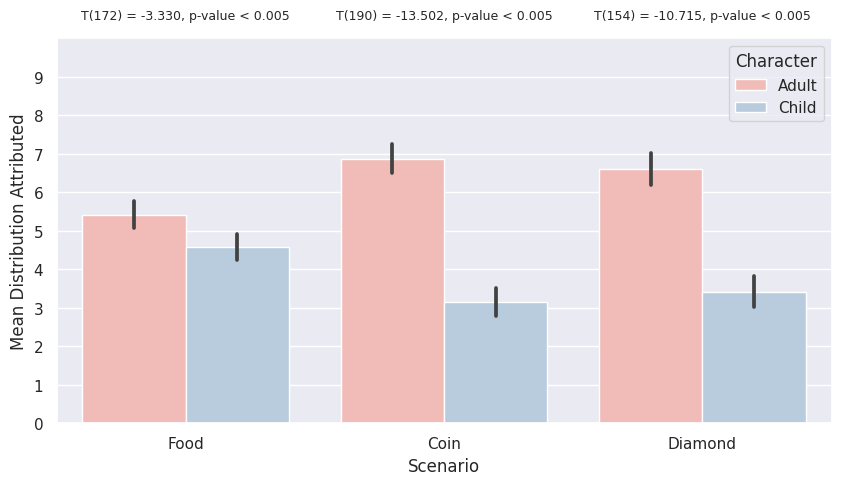

/root/work/library.py:193: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = data[data["Character"] == chars[1]][data["Scenario"] == scenario][
/root/work/library.py:196: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = data[data["Character"] == chars[0]][data["Scenario"] == scenario][


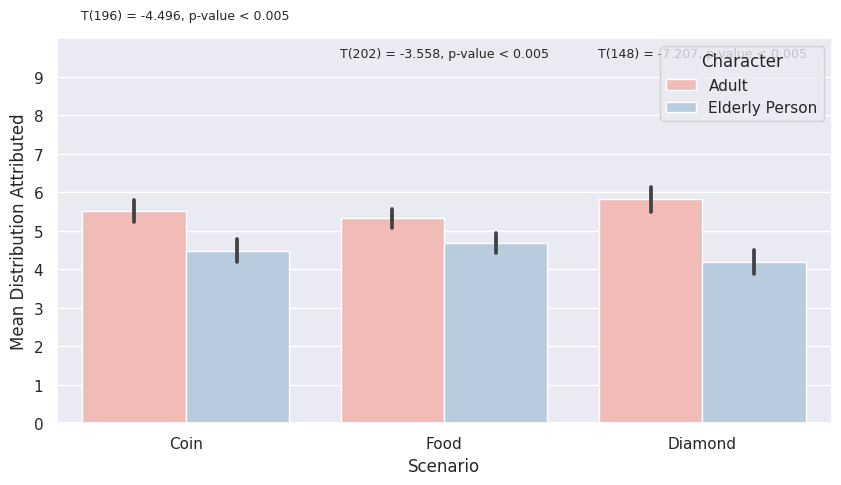

/root/work/library.py:193: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group1 = data[data["Character"] == chars[1]][data["Scenario"] == scenario][
/root/work/library.py:196: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  group2 = data[data["Character"] == chars[0]][data["Scenario"] == scenario][


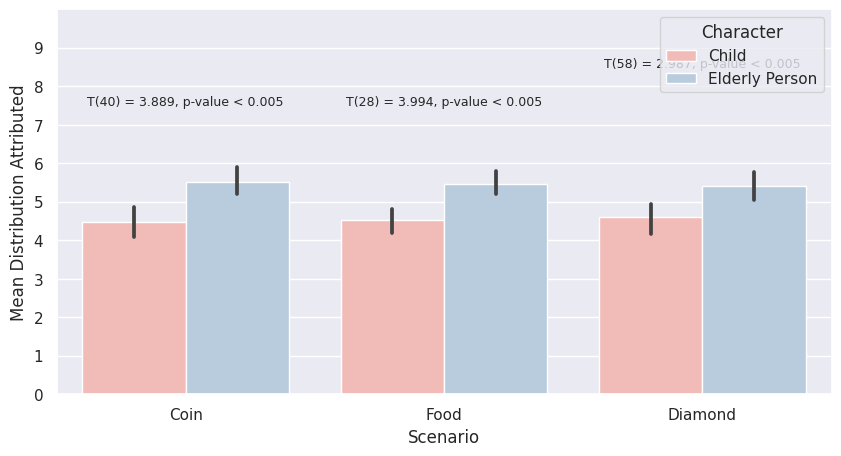

In [ ]:
#dataframe of only pair with robot against human
child = ["p1"]
old_person = ["p6"]
adult = [x for x in human if (x not in child) and (x not in old_person)]

data_ca = data[((data.left_char.isin(child)) & (data.right_char.isin(adult)) | (data.left_char.isin(adult)) & (data.right_char.isin(child)))]
data_ao = data[((data.left_char.isin(adult)) & (data.right_char.isin(old_person)) | (data.left_char.isin(old_person)) & (data.right_char.isin(adult)))]
data_co = data[(data.left_char.isin(child)) & (data.right_char.isin(old_person)) | (data.left_char.isin(old_person)) & (data.right_char.isin(child))]

data_ca = data_ca[data_ca.scenario > 6]
data_ao = data_ao[data_ao.scenario > 6]
data_co = data_co[data_co.scenario > 6]

data_ca["scenario"] = ["Food" if i == 9 else "Diamond" if i == 8 else "Coin" for i in data_ca["scenario"]]
for side in ["left","right"] :
    data_ca[side + "_char"] = ["Child" if i == "p1" else "Adult" for i in data_ca[side + "_char"]]
bar_plot(data_ca)

data_ao["scenario"] = ["Food" if i == 9 else "Diamond" if i == 8 else "Coin" for i in data_ao["scenario"]]
for side in ["left","right"] :
    data_ao[side + "_char"] = ["Elderly Person" if i == "p6" else "Adult" for i in data_ao[side + "_char"]]
bar_plot(data_ao)

data_co["scenario"] = ["Food" if i == 9 else "Diamond" if i == 8 else "Coin" for i in data_co["scenario"]]
for side in ["left","right"] :
    data_co[side + "_char"] = ["Child" if i == "p1" else "Elderly Person" for i in data_co[side + "_char"]]
bar_plot(data_co)

# Correlations between force and type of scenarios

### Risk

Spearmans correlation coefficient: 0.427
Samples are correlated (reject H0) p= 2.01e-85


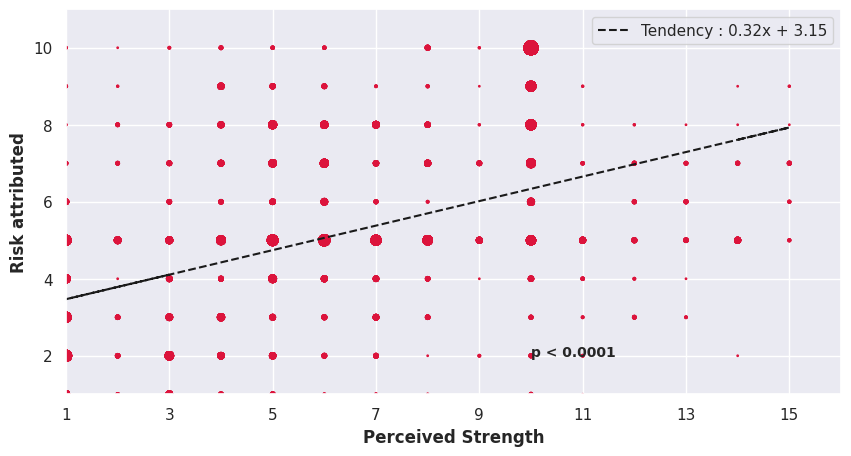

### Effort

Spearmans correlation coefficient: 0.477
Samples are correlated (reject H0) p= 3.47e-112


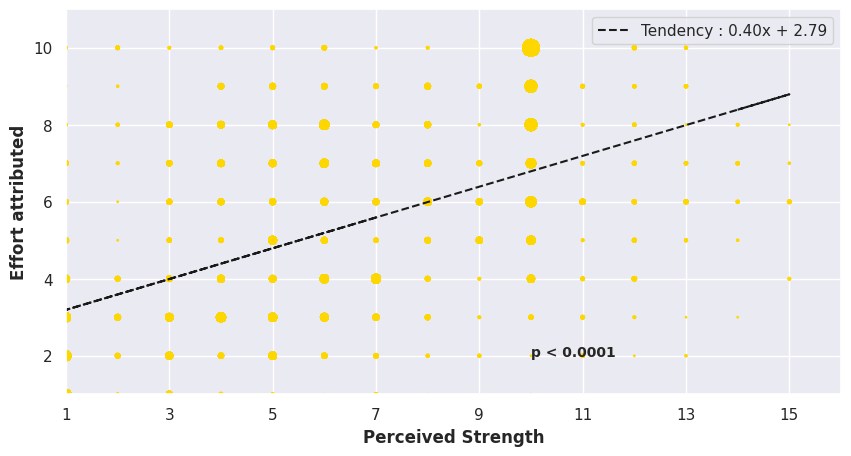

### Reward

Spearmans correlation coefficient: -0.045
Samples are correlated (reject H0) p= 4.78e-02


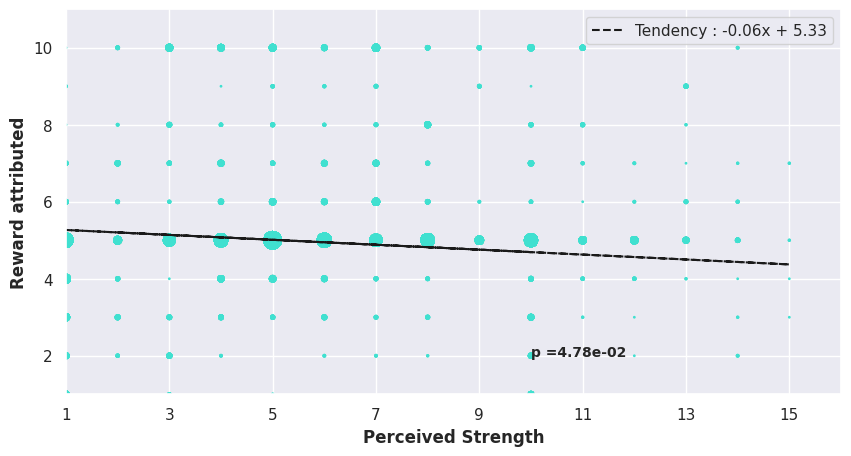

In [ ]:
#seprate df and put it in array 
danger = anova[anova.scenario < 4]
fatigue = anova[(anova.scenario > 3) & (anova.scenario < 7)]
reward = anova[anova.scenario > 6]

#init graph info in dict
graph_info = {"Risk": { "title" : 'Correlation in risk on perceived strength',
                        "color" : 'crimson',
                        "type" : "Risk",
                        "xlabel" : "Perceived Strength",
                        "ylabel" : "Risk attributed"},
             "Effort" : { "title" : 'Correlation in effort on perceived strength',
                         "color" : 'gold',
                         "type" : "Effort",
                        "xlabel" : "Perceived Strength",
                        "ylabel" : "Effort attributed"},
             "Reward" : { "title" : 'Correlation in reward on perceived strength',
                        "color" : 'turquoise',
                        "type" : "Reward",
                        "xlabel" : "Perceived Strength",
                        "ylabel" : "Reward attributed"}
             }

#set x and y
x_danger = danger.strength_left
y_danger = danger.value_left

x_fatigue = fatigue.strength_left
y_fatigue = fatigue.value_left

x_reward = reward.strength_left
y_reward = reward.value_left

#setup the 3 graphs
setup_force_correlation( x_danger,y_danger, graph_info["Risk"])

setup_force_correlation( x_fatigue,y_fatigue, graph_info["Effort"])

setup_force_correlation( x_reward,y_reward, graph_info["Reward"])


# Correlations between difference of force and difference attributed in type of scenarios

### DiffRisk

Spearmans correlation coefficient: 0.680
Samples are correlated (reject H0) p= 9.32e-259


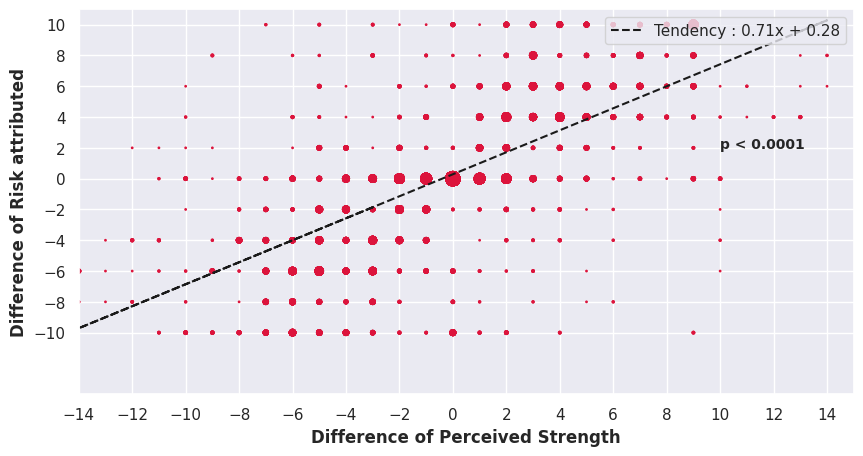

### DiffEffort

Spearmans correlation coefficient: 0.800
Samples are correlated (reject H0) p= 0.00e+00


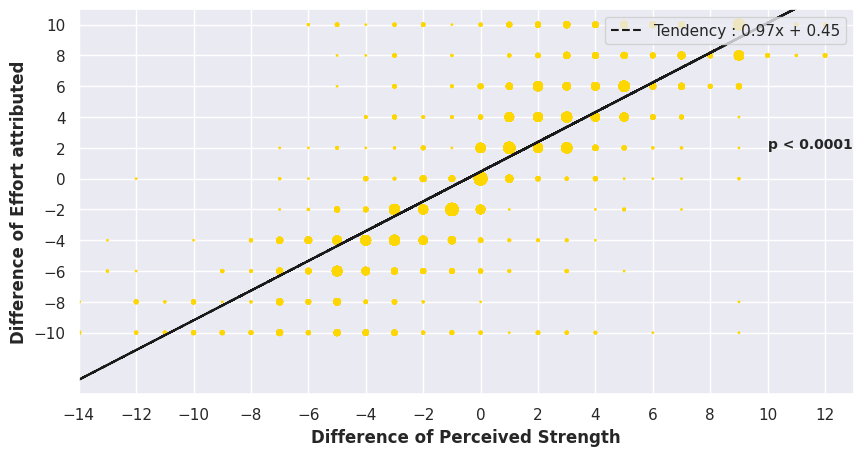

### DiffReward

Spearmans correlation coefficient: -0.033
Samples are uncorrelated (fail to reject H0) p= 1.49e-01


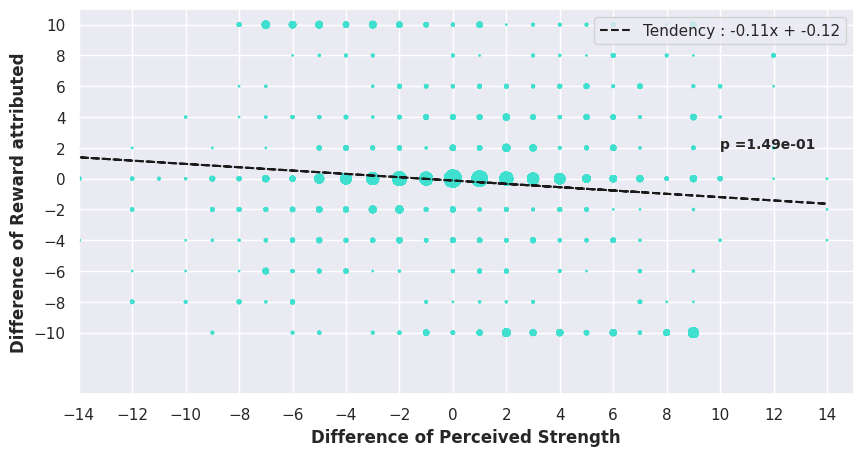

In [ ]:
#seprate df and put it in array 
danger = anova[anova.scenario < 4]
fatigue = anova[(anova.scenario > 3) & (anova.scenario < 7)]
reward = anova[anova.scenario > 6]

#init graph info in dict
graph_info = {"Risk": { "title" : 'Correlation on the difference of the attributed risk between the two characters and their difference of perceived strength',
                        "color" : 'crimson',
                        "type" : "DiffRisk",
                        "xlabel" : "Difference of Perceived Strength",
                        "ylabel" : "Difference of Risk attributed"},
             "Effort" : { "title" : 'Correlation on the difference of the attributed effort between the two characters and their difference of perceived strength',
                         "color" : 'gold',
                         "type" : "DiffEffort",
                        "xlabel" : "Difference of Perceived Strength",
                        "ylabel" : "Difference of Effort attributed"},
             "Reward" : { "title" : 'Correlation on the difference of the attributed reward between the two characters and their difference of perceived strength',
                        "color" : 'turquoise',
                        "type" : "DiffReward",
                        "xlabel" : "Difference of Perceived Strength",
                        "ylabel" : "Difference of Reward attributed"}
             }
#set x and y
x_danger = danger.strength_left - danger.strength_right
y_danger = 2 * danger.value_left - 10

x_fatigue = fatigue.strength_left - fatigue.strength_right
y_fatigue = 2 * fatigue.value_left - 10

x_reward = reward.strength_left - reward.strength_right
y_reward = 2 * reward.value_left - 10

#setup the 3 graphs
setup_force_correlation( x_danger,y_danger, graph_info["Risk"])

setup_force_correlation( x_fatigue,y_fatigue, graph_info["Effort"])

setup_force_correlation( x_reward,y_reward, graph_info["Reward"])


# Correlations between difference of age and difference attributed in type of scenarios

In [ ]:
#seprate df and put it in array 
danger = anova[anova.scenario < 4][anova.left_char != 'p7']
fatigue = anova[(anova.scenario > 3) & (anova.scenario < 7)][anova.left_char != 'p7']
reward = anova[anova.scenario > 6][anova.left_char != 'p7']

danger

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant,value_right
1,p6,p5,3,6,1,2,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
2,p6,p3,3,8,1,3,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
6,p1,p6,1,3,5,1,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
11,p6,p5,3,6,1,2,1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9
14,p1,p6,1,3,5,1,5,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,p5,p2,5,6,3,1,4,-1,1,22,195,0,e12954e890f1701804c8ccd73d74ca4d,7
5792,p5,p2,5,6,3,1,4,3,1,22,195,0,e12954e890f1701804c8ccd73d74ca4d,7
5807,p5,p1,14,1,7,1,-1,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,3
5809,p5,p1,14,1,9,1,7,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,1


In [ ]:
danger["left_char_age"] = [0 if i == "p1" else 1 if i in ['p2','p3','p4','p5'] else 2 for i in danger["left_char"]]
danger["right_char_age"] = [0 if i == "p1" else 1 if i in ['p2','p3','p4','p5'] else 2 for i in danger["right_char"]]
fatigue["left_char_age"] = [0 if i == "p1" else 1 if i in ['p2','p3','p4','p5'] else 2 for i in fatigue["left_char"]]
fatigue["right_char_age"] = [0 if i == "p1" else 1 if i in ['p2','p3','p4','p5'] else 2 for i in fatigue["right_char"]]
reward["left_char_age"] = [0 if i == "p1" else 1 if i in ['p2','p3','p4','p5'] else 2 for i in reward["left_char"]]
reward["right_char_age"] = [0 if i == "p1" else 1 if i in ['p2','p3','p4','p5'] else 2 for i in reward["right_char"]]
danger

,left_char,right_char,strength_left,strength_right,value_left,scenario,value_left_rep1,value_left_rep2,sex,age,height,have_child,id_participant,value_right,left_char_age,right_char_age
1,p6,p5,3,6,1,2,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9,2,1
2,p6,p3,3,8,1,3,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9,2,1
6,p1,p6,1,3,5,1,-1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5,0,2
11,p6,p5,3,6,1,2,1,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,9,2,1
14,p1,p6,1,3,5,1,5,-1,0,57,169,1,d60c0832fc30e645ca04f074c44b49eb,5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,p5,p2,5,6,3,1,4,-1,1,22,195,0,e12954e890f1701804c8ccd73d74ca4d,7,1,1
5792,p5,p2,5,6,3,1,4,3,1,22,195,0,e12954e890f1701804c8ccd73d74ca4d,7,1,1
5807,p5,p1,14,1,7,1,-1,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,3,1,0
5809,p5,p1,14,1,9,1,7,-1,1,21,170,0,d617476c80b6823ed202f5b86916156d,1,1,0


In [ ]:
def setup_age_correlation(x,y,graph_info ):
    #setup graph
    plt.figure(figsize=(10,5))
    plt.scatter(x,y, color= graph_info['color'],s= size_points(x, y))
    slope1, slope2, intercept = np.polyfit(x, y, 2)
    tendance = "Tendency : {:.2f}x² + {:.2f}x + {:.2f}".format(slope1, slope2, intercept)
    plt.plot(x,slope1*x**2 + slope2*x + intercept ,"k--", label=tendance)
    plt.ylabel(graph_info['ylabel'] , fontweight='bold')
    plt.xlabel(graph_info['xlabel'], fontweight='bold')
    plt.xticks(range(min(x),max(x)+1,2))
    plt.yticks(range(min(y),max(y)+1,2))
    plt.xlim(min(x),max(x)+1)
    plt.ylim(min(y),max(y)+1)
    p = show_spearmann(graph_info['type'],x,y)
    if p < 0.0001 :
        p_value = "p < 0.0001"
    else :
        p_value = "p =" + "{:.2e}".format(p)
    # ajout du texte de la tendance de la courbe
    plt.legend(loc='upper right')
    plt.savefig("Figures/force_corr_" + graph_info['type'] + ".pdf")
    plt.show()

### AgeDiffRisk

Spearmans correlation coefficient: 0.221
Samples are correlated (reject H0) p= 1.88e-19


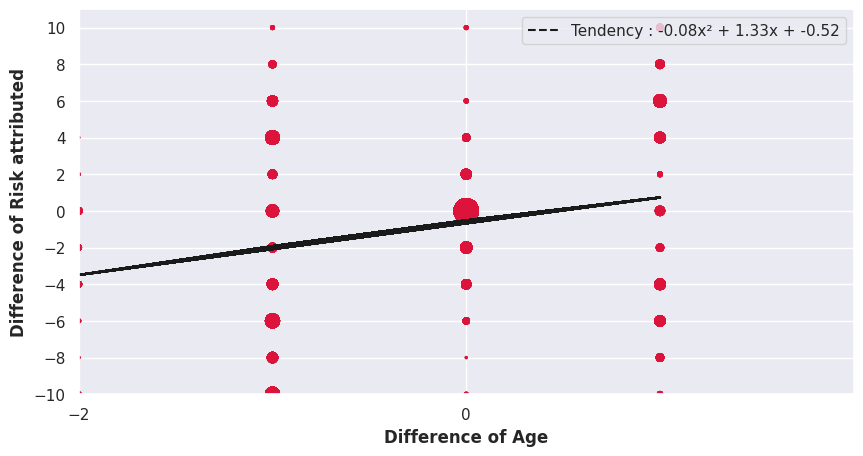

### AgeDiffEffort

Spearmans correlation coefficient: 0.267
Samples are correlated (reject H0) p= 1.92e-27


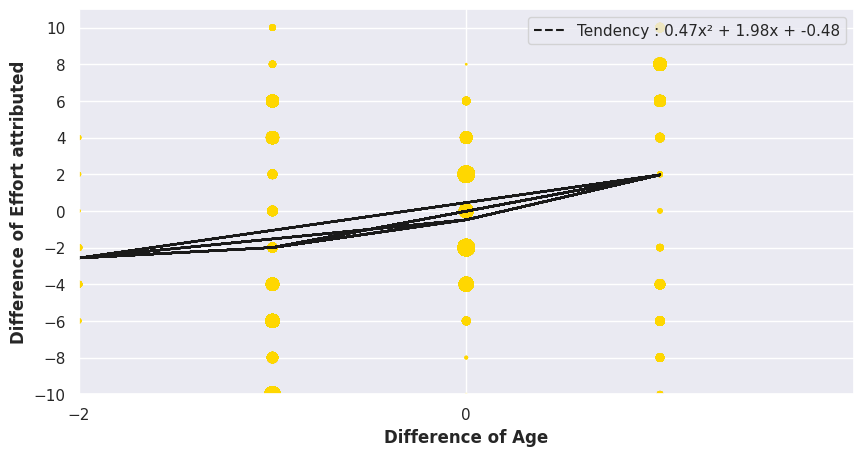

### AgeDiffReward

Spearmans correlation coefficient: -0.069
Samples are correlated (reject H0) p= 4.95e-03


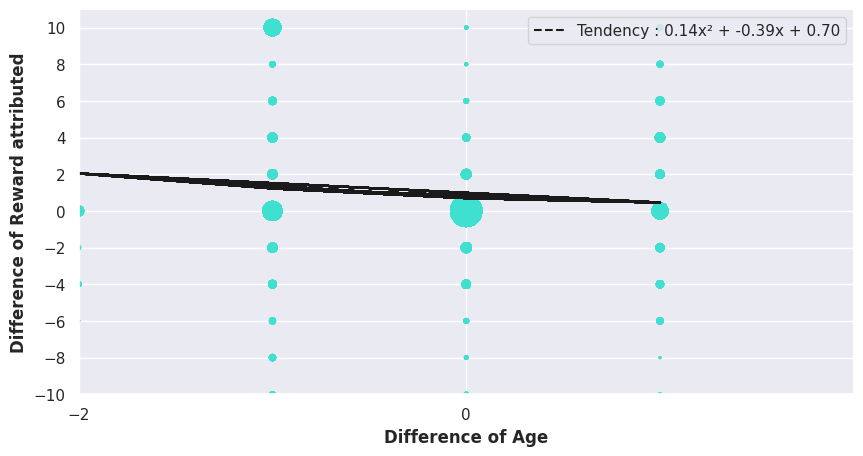

In [ ]:
#init graph info in dict
graph_info = {"Risk": { "title" : 'Correlation on the difference of the attributed risk between the two characters and their difference of perceived strength',
                        "color" : 'crimson',
                        "type" : "AgeDiffRisk",
                        "xlabel" : "Difference of Age",
                        "ylabel" : "Difference of Risk attributed"},
             "Effort" : { "title" : 'Correlation on the difference of the attributed effort between the two characters and their difference of perceived strength',
                         "color" : 'gold',
                         "type" : "AgeDiffEffort",
                        "xlabel" : "Difference of Age",
                        "ylabel" : "Difference of Effort attributed"},
             "Reward" : { "title" : 'Correlation on the difference of the attributed reward between the two characters and their difference of perceived strength',
                        "color" : 'turquoise',
                        "type" : "AgeDiffReward",
                        "xlabel" : "Difference of Age",
                        "ylabel" : "Difference of Reward attributed"}
             }
#set x and y
x_danger = danger.left_char_age - danger.right_char_age
y_danger = 2 * danger.value_left - 10

x_fatigue = fatigue.left_char_age - fatigue.right_char_age
y_fatigue = 2 * fatigue.value_left - 10

x_reward = reward.left_char_age - reward.right_char_age
y_reward = 2 * reward.value_left - 10

#setup the 3 graphs
setup_age_correlation( x_danger,y_danger, graph_info["Risk"])

setup_age_correlation( x_fatigue,y_fatigue, graph_info["Effort"])

setup_age_correlation( x_reward,y_reward, graph_info["Reward"])

# Correlations in repetitions

In [ ]:
#decision 1 vs decision 2
#toutes les données où value_left_rep2 == -1 et value_left_rep1 > -1
#x = value_left_rep1
#y = value_left

x_decision1 = anova[anova.value_left_rep2 == -1][anova.value_left_rep1 > -1].value_left_rep1
y_decision2 = anova[anova.value_left_rep2 == -1][anova.value_left_rep1 > -1].value_left


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


### Decision 2 vs Decision 1

Spearmans correlation coefficient: 0.868
Samples are correlated (reject H0) p= 0.00e+00


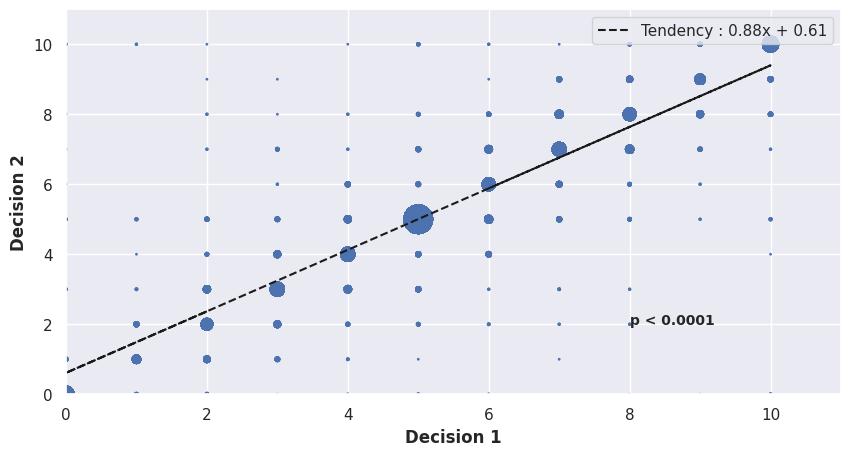

In [ ]:
 #setup graph
plt.figure(figsize=(10,5))
plt.scatter(x_decision1,y_decision2,s= size_points(x_decision1, y_decision2))
slope, intercept = np.polyfit(x_decision1, y_decision2, 1)
tendance = "Tendency : {:.2f}x + {:.2f}".format(slope, intercept)
plt.plot(x_decision1,slope*x_decision1 + intercept ,"k--", label=tendance)
plt.ylabel('Decision 2' , fontweight='bold')
plt.xlabel('Decision 1', fontweight='bold')
plt.xticks(range(min(x_decision1),max(x_decision1)+1,2))
plt.yticks(range(min(y_decision2),max(y_decision2)+1,2))
plt.xlim(min(x_decision1),max(x_decision1)+1)
plt.ylim(min(y_decision2),max(y_decision2)+1)
p = show_spearmann('Decision 2 vs Decision 1',x_decision1,y_decision2)
if p < 0.0001 :
    p_value = "p < 0.0001"
else :
    p_value = "p =" + "{:.2e}".format(p)
# ajout du texte de la tendance de la courbe
plt.text(8, 2, p_value, fontweight = 'bold', fontsize = 10)
plt.legend(loc='upper right')
plt.savefig("Figures/decision2vsdecision1.png")
plt.show()

In [ ]:
#decision 2 vs decision 3
#toutes les données où value_left_rep2 > -1 et value_left_rep1 > -1
#x = value_left
#y = value_left_rep2
x_decision3 = anova[anova.value_left_rep2 > -1][anova.value_left_rep1 > -1].value_left
y_decision2 = anova[anova.value_left_rep2 > -1][anova.value_left_rep1 > -1].value_left_rep2

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Decision 2 vs Decision 3

Spearmans correlation coefficient: 0.897
Samples are correlated (reject H0) p= 0.00e+00


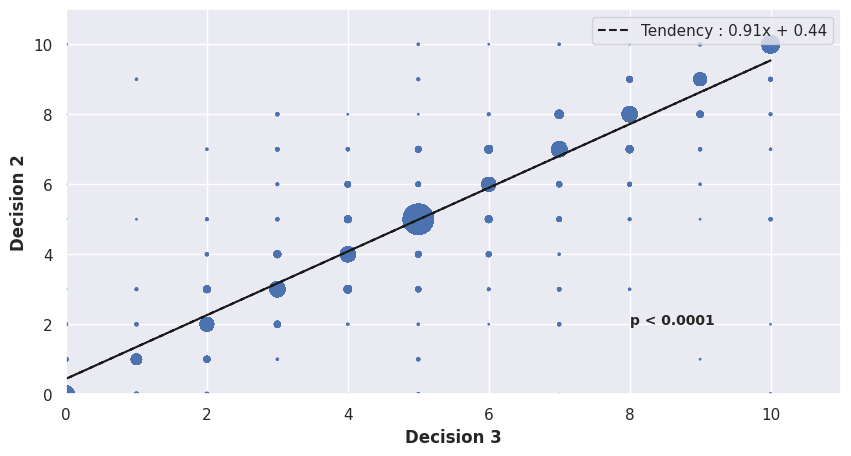

In [ ]:
 #setup graph
plt.figure(figsize=(10,5))
plt.scatter(x_decision3,y_decision2,s= size_points(x_decision3, y_decision2))
slope, intercept = np.polyfit(x_decision3, y_decision2, 1)
tendance = "Tendency : {:.2f}x + {:.2f}".format(slope, intercept)
plt.plot(x_decision3,slope*x_decision3 + intercept ,"k--", label=tendance)
plt.ylabel('Decision 2' , fontweight='bold')
plt.xlabel('Decision 3', fontweight='bold')
plt.xticks(range(min(x_decision3),max(x_decision3)+1,2))
plt.yticks(range(min(y_decision2),max(y_decision2)+1,2))
plt.xlim(min(x_decision3),max(x_decision3)+1)
plt.ylim(min(y_decision2),max(y_decision2)+1)
p = show_spearmann('Decision 2 vs Decision 3',x_decision3,y_decision2)
if p < 0.0001 :
    p_value = "p < 0.0001"
else :
    p_value = "p =" + "{:.2e}".format(p)
# ajout du texte de la tendance de la courbe
plt.text(8, 2, p_value, fontweight = 'bold', fontsize = 10)
plt.legend(loc='upper right')
plt.savefig("Figures/decision2vsdecision3.png")
plt.show()

In [ ]:
#decision 1 vs decision 3
#toutes les données où value_left_rep2 > -1 et value_left_rep1 > -1
#x = value_left_rep1
#y = value_left
x_decision1 = anova[anova.value_left_rep2 > -1][anova.value_left_rep1 > -1].value_left_rep1
y_decision3 = anova[anova.value_left_rep2 > -1][anova.value_left_rep1 > -1].value_left

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


### Decision 3 vs Decision 1

Spearmans correlation coefficient: 0.851
Samples are correlated (reject H0) p= 0.00e+00


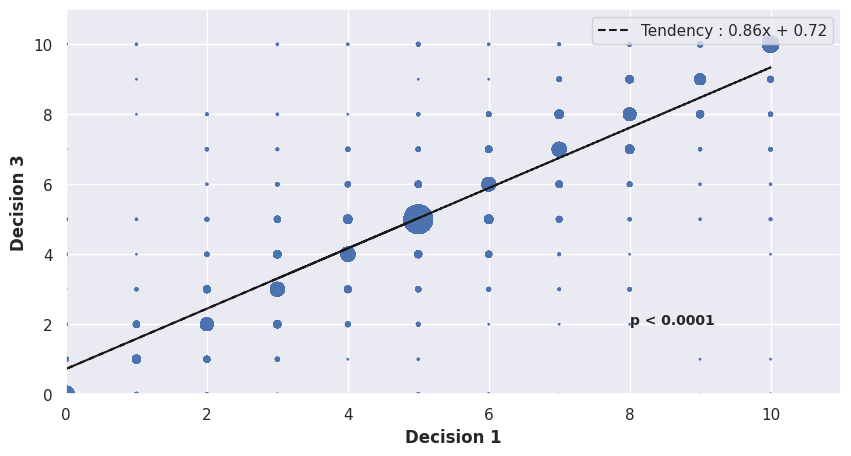

In [ ]:
 #setup graph
plt.figure(figsize=(10,5))
plt.scatter(x_decision1,y_decision3,s= size_points(x_decision1, y_decision3))
slope, intercept = np.polyfit(x_decision1, y_decision3, 1)
tendance = "Tendency : {:.2f}x + {:.2f}".format(slope, intercept)
plt.plot(x_decision1,slope*x_decision1 + intercept ,"k--", label=tendance)
plt.ylabel('Decision 3' , fontweight='bold')
plt.xlabel('Decision 1', fontweight='bold')
plt.xticks(range(min(x_decision1),max(x_decision1)+1,2))
plt.yticks(range(min(y_decision3),max(y_decision3)+1,2))
plt.xlim(min(x_decision1),max(x_decision1)+1)
plt.ylim(min(y_decision3),max(y_decision3)+1)
p = show_spearmann('Decision 3 vs Decision 1',x_decision1,y_decision3)
if p < 0.0001 :
    p_value = "p < 0.0001"
else :
    p_value = "p =" + "{:.2e}".format(p)
# ajout du texte de la tendance de la courbe
plt.text(8, 2, p_value, fontweight = 'bold', fontsize = 10)
plt.legend(loc='upper right')
plt.savefig("Figures/decision3vsdecision1.png")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=df420847-9b7d-4085-bb2b-2d13083511fa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>